<a href="https://colab.research.google.com/github/sbogde/scikit-regressions-and-confessions/blob/main/week3_05_random_forest_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression


In [19]:
# Step 1: Generate synthetic regression data
# Creating a dataset with 200 samples and 5 features, adding slight noise
X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)

In [20]:
# Step 2: Initialize RandomForestRegressor
# Setting up the model with 100 trees in the forest and a random state
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [21]:
# Step 3: Set up KFold cross-validation
# Using 5 folds for cross-validation to split the data
# Each part will be used once as the validation set while the remaining 4 parts are used for training
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# Step 4: Perform cross-validation
# Calculating the cross-validation scores using negative mean squared error as the scoring method
# (We use negative MSE because higher values typically indicate better performance in sklearn metrics)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')


In [24]:
# Step 5: Convert scores to positive for visualization
# Since the scores are returned as negative (to fit into a "maximize score" framework),
# we convert them to positive MSE values
cv_scores = -cv_scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

In [26]:
# Step 6: Plot cross-validation results
# Plotting the cross-validation MSE for each fold
print("Cross-validation Mean Squared Error scores:", cv_scores)
print("Mean MSE score:", cv_mean)
print("Standard Deviation of MSE scores:", cv_std)

Cross-validation Mean Squared Error scores: [778.86382806 771.06632642 906.62028352 521.22819489 639.97386224]
Mean MSE score: 723.550499025603
Standard Deviation of MSE scores: 131.72033493913457


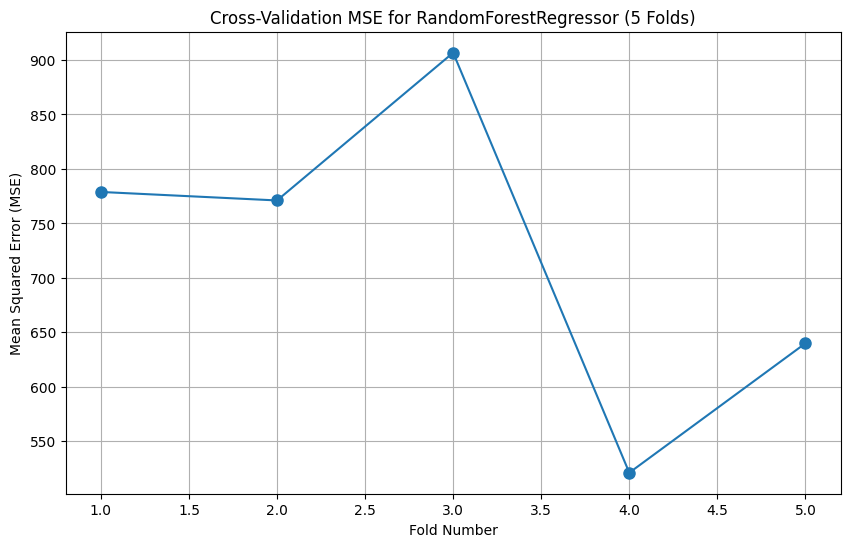

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', markersize=8)
plt.xlabel("Fold Number")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cross-Validation MSE for RandomForestRegressor (5 Folds)")
plt.grid(True)
plt.show()

In [29]:
# X